<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/HealthcareData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Source

https://dimensions.figshare.com/articles/dataset/Dimensions_COVID-19_publications_datasets_and_clinical_trials/11961063

This is a clinical trial dataset.This dataset contains all relevant publications, datasets and clinical trials from Dimensions that are related to COVID-19. 
We are only using clinical trials dataset.

Word embeddings are domain specific. General word embeddings might not work well with healthcare data.
We will be using Word2Vec and Fasttext embeddings in this project. In this project,
we will create medical word embeddings using Word2vec and FastText in python.Finally an optional part of the project is to create a search engine along with a Streamlit UI.

# Project Goal

The goal of the project is to create a model that facilitates improved document search when entering a query. The abstract and titles of all documents are used to create embeddings (wor2vec and fasttext pre-trained models are used) and are utilized when the user enters a query to retrieve top N relevant documents.

# Project Path

1. Importing the required libraries
2. Reading the dataset
3. Pre-processing
      1. Remove URLs
      2. Convert text to lower case
      3. Remove numerical values
      4. Remove punctuation.
      5. Perform tokenization
      6. Remove stop words
      7. Perform lemmatization
      8. Remove ‘\n’ character from the columns
4. Exploratory Data Analysis (EDA) 
5. Data Visualization using word cloud
6. Training the ‘Skip-gram’ model
7. Training the ‘FastText’ model
8. Model embeddings – Similarity
9. PCA plots for Skip-gram and FastText models
10. Convert abstract and title to vectors using the Skip-gram and FastText model
11. Use the Cosine similarity function
12. Perform input query pre-processing
13. Define a function to return top ‘n’ similar results  
14. Result evaluation
15. Run the Streamlit Application (Optional)



In [1]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [2]:
import matplotlib.pyplot as plt # our main display package
import plotly.graph_objects as go
import string # used for preprocessing
import re # used for preprocessing
import nltk # the Natural Language Toolkit, used for preprocessing
import numpy as np # used for managing NaNs
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Data Preprocessing

In [3]:
df=pd.read_csv('Dimension-covid.csv')   #for preprocessing
df1=pd.read_csv('Dimension-covid.csv')  #for returning results

In [4]:
df.shape

(10666, 21)

In [5]:
df.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,Intervention,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,The aim was to determine the coronavirus anxie...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,A survey form was applied to individuals inclu...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,This is a randomized controlled trial to exami...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,Placebo (Dietary Supplement); palmitoylethanol...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,The purpose of this study is to learn how to b...,2021-04-14,2021; 2022,NaN,Covid19,PneumoniaCheck (Device),All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,Pain Rehabilitation Virtual Reality (PR-VR) At...,PR-VR At-home Program During and After COVID-19,NaN,Poorly controlled chronic pain in teens can im...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",Custom VR (Other); Off the Shelf VR (Other),All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,Perceived Health After Hospitalization for COV...,Perceived Health After Hospitalization for COV...,PRO-COVID,There are currently no precise data available ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",Questionnaires (Other),All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


We are interested in the abstract column because it gives us details of the trial.



In [6]:
df['Abstract'][0]

'The aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects.\n\nDetailed Description\nThe aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects. This study was completed with the descriptive, cross-sectional and relational screening model. The full sampling method was used in the study. The study was completed with 105 individuals with metabolic syndrome attending the diet clinic and 109 healthy individuals without MetS diagnosis also attending the diet clinic. Collection of data used anthropometric measurements and biochemical findings, blood pressure and a survey f

Here we will write some functions to clean the data.

In [7]:
def remove_urls(text):    
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

# make all text lowercase
def text_lowercase(text):
    return text.lower()

# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

# lemmatize Words 
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

#Creating one function so that all functions can be applied at once
def preprocessing(text):
    
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [8]:
#Applying preprocessing and removing '\n' character

for i in range(df.shape[0]):
    df['Abstract'][i]=preprocessing(str(df['Abstract'][i])) 
for text in df.Abstract:

    text=text.replace('\n',' ')    

In [9]:
x=[word_tokenize(word) for word in df.Abstract ]   #Tokenizing data for training purpose

In [10]:
df.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,Intervention,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,aim determine coronavirus anxiety level emotio...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,A survey form was applied to individuals inclu...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,randomized controlled trial examine effect foo...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,Placebo (Dietary Supplement); palmitoylethanol...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,purpose study learn better detect infection un...,2021-04-14,2021; 2022,NaN,Covid19,PneumoniaCheck (Device),All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,Pain Rehabilitation Virtual Reality (PR-VR) At...,PR-VR At-home Program During and After COVID-19,NaN,poorly controlled chronic pain teen impact qua...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",Custom VR (Other); Off the Shelf VR (Other),All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,Perceived Health After Hospitalization for COV...,Perceived Health After Hospitalization for COV...,PRO-COVID,currently precise data available impact covid ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",Questionnaires (Other),All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


In [11]:
df['Abstract'][0]

'aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject detailed description aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject study completed descriptive cross sectional relational screening model full sampling method used study study completed individual metabolic syndrome attending diet clinic healthy individual without mets diagnosis also attending diet clinic collection data used anthropometric measurement biochemical finding blood pressure survey form coronavirus anxiety scale ca emotional eating scale ee'

In [12]:
#Applying preprocessing and removing '\n' character
# Including title column in the analysis
for i in range(df.shape[0]):
    df['Title'][i]=preprocessing(str(df['Title'][i])) 
for text in df.Title:

    text=text.replace('\n',' ') 

# Exploratory Data Analysis

In [13]:
from collections import Counter
cnt = Counter()
for text in df["Abstract"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)  #top 10 common words

[('patient', 38457),
 ('covid', 38211),
 ('study', 31963),
 ('group', 12771),
 ('treatment', 12471),
 ('day', 12337),
 ('sars', 11600),
 ('cov', 11535),
 ('clinical', 11507),
 ('disease', 11395)]

In [14]:
!pip install wordcloud

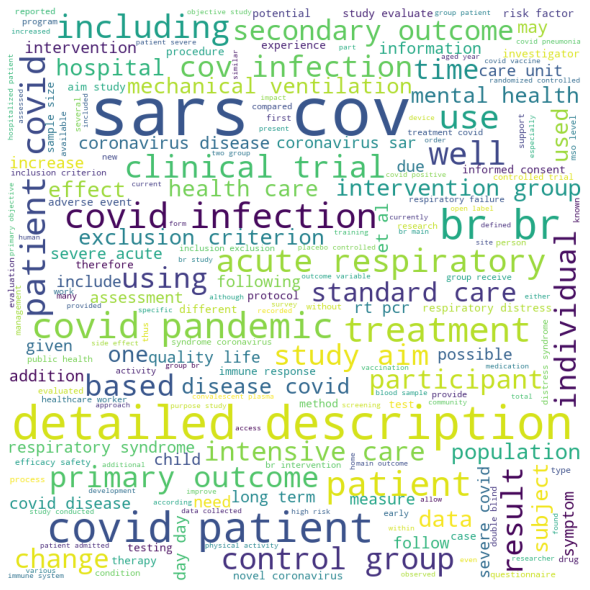

In [15]:
#Final word cloud after all the cleaning and pre-processing
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
#comment_words = ' '
stopwords = set(STOPWORDS) 
from pandas.core.common import flatten

# iterate through the csv file 


comment_words=flatten(x)
comment_words=' '.join(comment_words)


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

# Training skipgram model


In [16]:
# training the model

skipgram = Word2Vec(x, size =50, window = 3, min_count=2,sg = 1)
print(skipgram)
skipgram.save('skipgramx1.bin')

Word2Vec(vocab=24877, size=50, alpha=0.025)


In [17]:
# training the model

skipgram = Word2Vec(x, size =100, window = 1, min_count=2,sg = 1)
print(skipgram)
skipgram.save('skipgramx11.bin')

Word2Vec(vocab=24877, size=100, alpha=0.025)


In [18]:
# Loading the model
skipgram = Word2Vec.load('skipgramx11.bin')

# Training the Fasttext Model

In [19]:
fast_n= FastText(x,size=200, window=3, min_count=2, workers=5, min_n=1, max_n=2,sg=1)  #training fasttext Model, with skipgram
fast_n=fast_n.save('fast_p.bin')    #Saving our model
fast_n = Word2Vec.load('fast_p.bin')  #Loading our pretrained model

In [20]:
FastText=FastText(x,size=100, window=2, min_count=2, workers=5, min_n=1, max_n=2,sg=1)
FastText.save('FastText.bin')    #Saving our model
FastText = Word2Vec.load('FastText.bin')  #Loading our pretrained model

# Model Embeddings and Similarity

In [21]:
# Similar words - skipgram

skipgram.wv.most_similar(positive=['corona'],topn=10)

[('coronavirus', 0.7623671293258667),
 ('covid', 0.7123924493789673),
 ('novelty', 0.6947617530822754),
 ('frightful', 0.6834431886672974),
 ('uremic', 0.6815999746322632),
 ('crown', 0.6797010898590088),
 ('declares', 0.6792927384376526),
 ('covd', 0.6754946708679199),
 ('betacoronavirus', 0.6744226813316345),
 ('evd', 0.6680651903152466)]

In [22]:
skipgram.wv.most_similar(positive=['patient'],topn=10)

[('subject', 0.768267810344696),
 ('participant', 0.7506323456764221),
 ('hospitalised', 0.7454291582107544),
 ('acutely', 0.741694450378418),
 ('moderately', 0.740178108215332),
 ('recovering', 0.7084949016571045),
 ('pwcf', 0.7074869871139526),
 ('individual', 0.7029805779457092),
 ('chronically', 0.6998432874679565),
 ('critically', 0.6978839039802551)]

In [23]:
# Similar words - fasttext

FastText.wv.most_similar(positive=['lung'],topn=10)

[('leung', 0.7982017397880554),
 ('lungiq', 0.7902092933654785),
 ('lure', 0.7410720586776733),
 ('sung', 0.7219512462615967),
 ('volunteering', 0.7180712819099426),
 ('laung', 0.7170141935348511),
 ('lag', 0.7144783735275269),
 ('pulmonary', 0.7107897400856018),
 ('silicovilung', 0.7069328427314758),
 ('pulling', 0.7069145441055298)]

In [24]:
FastText.wv.most_similar(positive=['breathing'],topn=10)

[('breaching', 0.9253047108650208),
 ('rebreathing', 0.9233959317207336),
 ('breathe', 0.908920168876648),
 ('breaking', 0.8947873115539551),
 ('bathing', 0.8923891186714172),
 ('breath', 0.8899846076965332),
 ('breathed', 0.8744425773620605),
 ('babybreathe', 0.8718680143356323),
 ('breathable', 0.8645215034484863),
 ('bringing', 0.8584084510803223)]

# PCA Plots

In [25]:
X = skipgram.wv[skipgram.wv.index2word]    #storing arrays of all words
pca = PCA(n_components=2)                    #applying PCA to convert data into two dimensions
result = pca.fit_transform(X)

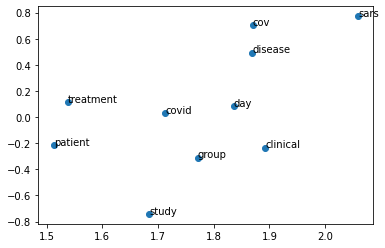

In [26]:
#words embeddings on the plot to check 2-D representation of each word
pyplot.scatter(result[:10, 0], result[:10, 1])
words = list(skipgram.wv.index2word)
for i, word in enumerate(words[:10]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [27]:
#same thing as above but with fasttext model
X_fast = FastText.wv[FastText.wv.index2word]
pca = PCA(n_components=2)
result_fast = pca.fit_transform(X_fast)

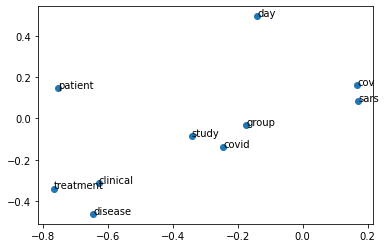

In [28]:
pyplot.scatter(result_fast[:10, 0], result_fast[:10, 1])
words = list(FastText.wv.index2word)
for i, word in enumerate(words[:10]):
    pyplot.annotate(word, xy=(result_fast[i, 0], result_fast[i, 1]))
pyplot.show()

# Create Vectors

Here we create a function to take average of all vectors of each word in abstract, so that each abstract can represent (1,100) dimensional vector.

In [29]:
def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in tokenize(words) if word in list(word2vec_model.wv.index2word)] #if word is in vocab 
    if len(words) >= 1:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return np.array([0]*100)

# Abstract to vectors using skipgram

In [30]:
K1=[]                                     #defining empty list
for i in df.Abstract:
    K1.append(list(get_mean_vector(skipgram, i)))     #appending array to the list
    
    
K11=pd.DataFrame(K1).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K11.to_csv('skipgram-vec.csv')

In [40]:
K=pd.read_csv('skipgram-vec.csv')   #Loading our pretrained vectors of each abstract

skipgram_vectors=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    skipgram_vectors.append(K[str(i)].values)

In [31]:
K1_title=[]
for i in df.Title:         #instead of abstract use title
    K1_title.append(list(get_mean_vector(skipgram, i)))    

    
K1_title=pd.DataFrame(K1).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K1_title.to_csv('skipgram-vec-title.csv')  

In [32]:
K=pd.read_csv('skipgram-vec-title.csv')   #Loading our pretrained vectors of each abstract

K2_title=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    K2_title.append(K[str(i)].values)

# Abstract to vector using fasttext



In [33]:
K_fast=[]                                     #defining empty list
for i in df.Abstract:
    K_fast.append(list(get_mean_vector(FastText, i)))     #appending array to the list
    
K11=pd.DataFrame(K_fast).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K11.to_csv('FastText-vec.csv')

In [34]:
data=pd.read_csv('FastText-vec.csv')   #Loading our pretrained vectors of each abstract

fast_vectors=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    fast_vectors.append(data[str(i)].values)

# Calculate Cosine similarity

In [35]:
#defining function to define cosine similarity

from numpy import dot
from numpy.linalg import norm

def cos_sim(a,b):

    return dot(a, b)/(norm(a)*norm(b)) 

# User query pre-processing


In [36]:
def preprocessing_input(query,word2vec_model):
    query=preprocessing(query)
    query=query.replace('\n',' ')
    K=get_mean_vector(word2vec_model,query)
   
        
    return K  

# Function that returns top-n results

In [37]:
pd.set_option("display.max_colwidth", -1)       #this function will display full text from each column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [38]:
#query - input query
# p - average vectors for all abs
#df1 - original

def top_n(query,p,df1,model):    
    print(query)
    
    query=preprocessing_input(query,model)    #preprocessing input to list of vectors
                                    
    x=[]
    #Converting cosine similarities of overall data set with input queries into LIST
    for i in range(len(p)):
        x.append(cos_sim(query,p[i]))
    
    
 #store list in tmp to retrieve index
    tmp=list(x)
    
 #sort list so that largest elements are on the far right
    
    res = sorted(range(len(x)), key = lambda sub: x[sub])[-5:]
    sim=[tmp[i] for i in reversed(res)]
    print(sim)
 #get index of the 10 or n largest element
    L=[]
    for i in reversed(res):
    
        L.append(i)
    return df1.iloc[L, [1,2,5,6]],sim     #returning dataframe (only id,title,abstract ,publication date)

# Evaluating Results

In [41]:
# skipgram model

#Input your search query here

Query = "lung failure"

Results,sim = top_n(Query,skipgram_vectors,df1,skipgram)
Results

lung failure
[0.8063837039020231, 0.7966406602657087, 0.7826053557571355, 0.7776672935405998, 0.7761682826251987]


,Trial ID,Title,Abstract,Publication date
548,2021-000988-68,Immune response after covid-19 vaccination in patients with renal failure stadium 4 or 5 .,Renal failure stage 4 and 5.,2021-03-31
4235,NCT04597853,"Assessment of Lung Mechanics in SARS-CoV-2/ COVID-19 Acute Respiratory Distress Syndrome: A Holistic, Longitudinal Analysis of the Lung-heart-ventilator Interaction","This study is meant to assess the lung mechanics in SARS-CoV-2 induced acute respiratory failure. A precise characterisation of lung mechanics and heart-lung-interactions might allow a better understanding of SARS-CoV-2 induced acute respiratory failure and thus lead to better mechanical ventilation strategies. This monocentric, observational study of critically ill COVID-19 patients in the ICU, will employ impedance tomography, right-heart catheterization, oesophageal pressure measurements, indirect calorimetry as well as classic mechanical ventilation parameters to characterise the mechanical characteristics of the lung as well as the heart-lung interactions in SARS-CoV-2 induced acute respiratory failure.",2021-03-01
7831,2020-001807-18,"A Phase 2, Randomized, Double-Blind, Placebo-Controlled, Parallel-group, Multi-center Study of an Inhaled Pan-Janus Kinase Inhibitor, TD-0903, to Treat Symptomatic Acute Lung Injury Associated with COVID-19",Acute lung injury associated with COVID-19,2020-10-13
9785,2020-001236-10,"COUNTER-COVID - Oral imatinib to prevent pulmonary vascular leak in Covid19 a randomized, double --blind, placebo controlled, clinical trial in patients with severe Covid19 disease","Covid19 is characterized by hypoxemic respiratory failure, caused by extensive vascular leak and pulmonary edema early in the course of disease.",2020-12-10
10124,CHICTR2000030578,Clinical Prediction and Intervention of Pulmonary Function Impairment in Patients with Novel Coronavirus Pneumonia (COVID-19),"1. Establish a cohort of survivors of new coronavirus pneumonia, track their lung function damage and changes after discharge, and establish a predictive model of lung function impairment of new coronavirus pneumonia;\n2. Explore lung rehabilitation in patients with impaired lung function effect.",2020-02-01


In [42]:
# fasttext model

#Input your search query here

Query = "breathe"

Results,sim=top_n(Query,fast_vectors,df1,FastText)
Results

breathe
[0.8095736567477441, 0.8065974923084668, 0.8045967403623254, 0.7979409128533179, 0.794286882185419]


,Trial ID,Title,Abstract,Publication date
3386,CHICTR2000040388,A prospective randomized control study comparing modified oropharyngeal airway with Guedel's airway for tracheal tube exchange and smooth extubation in gynecological laparoscopic surgery,"With the outbreak of COVID-19, extubation and cough in patients with perioperative intubation during recovery has become a more serious problem. Extubation under deep anesthesia can reduce the reflex of cough to a certain extent and reduce the spread of the epidemic.However, extubation under deep anesthesia may cause respiratory obstruction, and the placement of oropharyngeal airway after extubation can keep the pharynx unblocked and normal breathing.But the traditional oropharyngeal airway can induce restlessness, nausea, vomiting, coughing and even increased heart rate and blood pressure.\nIn this study, the hemodynamic fluctuation and choking were observed after the traditional oropharyngeal airway (OROPharyngeal airway) and the improved oropharyngeal airway (ORopharyngeal airway) were placed after extubation, so as to provide some evidences to support the extensive clinical application of such improved oropharyngeal airway (ORopharyngeal airway).",2020-11-01
678,2021-001144-98,The use of amantadine in the prevention of progression and treatment of COVID-19 symptoms in patients infected with the SARS-CoV-2 virus,"SARS-CoV-2 infection with one or more of the following symptoms: fever, cough, muscle aches, mild breathlessness, chest pain, diarrhea, nausea, vomiting, anosmia, lack of taste, sore throat, nasal congestion",2021-03-11
3272,NCT04649931,Study to Evaluate Whether Differences in Exhaled Breath Can be Identified Using Ion Mobility Spectrometry (IMS) in Subjects Tested Positive for SARS-CoV-2 Infection and Subjects Tested Negative,Breath gas analysis is the evaluation of exhaled breath. It aims to evaluate the volatile organic compounds (VOCs) in exhaled breath. In this feasibility study it is intended to find specific peaks/pattern in exhaled breath indicating an infection with SARS-CoV-2 (severe acute respiratory syndrome coronavirus 2).,2020-12-14
2137,CHICTR2100043210,"Traditional Chinese medicine auricular point acupressure for the relief of pain, fatigue, and gastrointestinal adverse reactions after the injection of novel coronavirus-19 vaccines: a multicentre, three-arm, single-blind, prospective randomized controlled trial","To investigate whether traditional Chinese medicine auricular point acupressure can alleviate and (or) reduce the pain (including injection site pain, headache, other muscle and joint pain), fatigue, and gastrointestinal adverse reactions (including nausea, vomiting, diarrhea), and the degree of the alleviation, after the injection of novel coronavirus-19 vaccines.",2021-02-20
2142,CTRI/2021/02/031052,Comparison of endotracheal intubation with Macintosh versus King vision video-laryngoscope using COVID-19 barrier box on manikins: A randomised crossover study,"Airway management plays an essential role in both anaesthesia practice and emergency medicine. In the present COVID-19 pandemic various barriers are suggested during aerosol generating procedures (AGPs). COVID-19 barrier box is one such barrier to restrict the spread of aerosol, thus decreasing the risk of transmission of infection to the intubating health care personnel. (1) Although the need for a change in intubation practice, through barriers to reduce the aerosol spread is apparent, but it will not be without a learning curve. Moreover, the ease of intubation using either laryngoscopes through the barrier box could vary. We plan to compare the ease of intubation two types of laryngoscopes in the manikin and hypothesize that both the laryngoscopes are comparable.\n\n\nPrimary Outcome:\n\nTime required for successful intubation (IT) in seconds measured by an observer\n\n\n\nSecondary Outcome:\n\nEase of Intubation ( Perception of intubation difficulties, no. of attempts of intubation)\

# Conclusion

For different queries, the model performance of both the models can be considered to be comparable. We can further use more sophisticated models like BERT to improve the performance. There are existing pre-trained medical embeddings that can be used to achieve higher accuracy.